# Especialização em Inteligência Artificial – IFMG
## Trabalho da disciplina de Aprendizado de Máquina
**Autor**: Alexandre Fortes Santana

**Professor**: Professor Frederico Gadelha Guimarães - DCC – UFMG

## Orientações trabalho final

Para cada base de dados, efetuar o pipeline completo de aprendizado de máquina para os seguintes métodos: K-NN, Naive Bayes, Árvore de decisão.

Separar seus dados em conjuntos de treinamento e teste, utilizando alguma metodologia vista em aula para a partição: hold-out, k-fold cross validation, etc.

Discutir os resultados obtidos quanto ao desempenho estimado e comparar os diferentes métodos.

# Dataset 2: Stroke Prediction Dataset

Dataset disonível em: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### About Dataset  

#### Context  
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.  
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.  

#### Attribute Information 
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [4]:
import pandas as pd

# Carregar o conjunto de dados
df = pd.read_csv('StrokePredictionDataset/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Análise exploratória

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [24]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


1. **Distribuição de idade, nível médio de glicose no sangue e índice de massa corporal (bmi):**

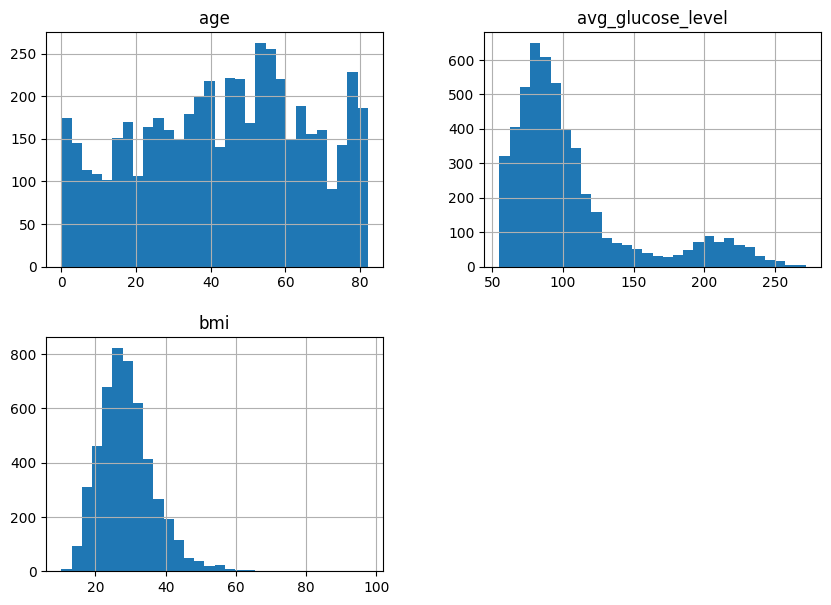

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

df[['age', 'avg_glucose_level', 'bmi', ]].hist(bins=30, figsize=(10, 7))
plt.show()

2. **Contagem de pacientes com AVC e sem AVC:**

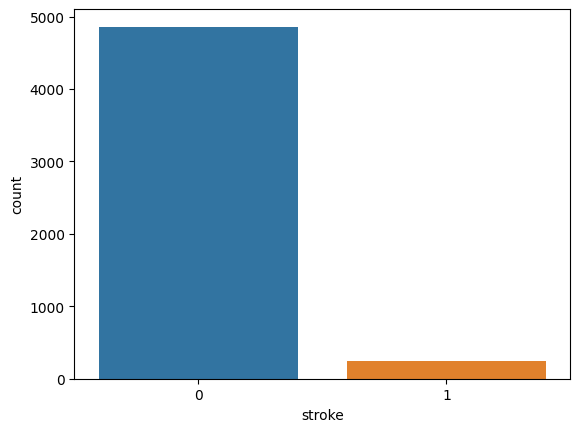

In [8]:
sns.countplot(x='stroke', data=df)
plt.show()

3. **Contagem de pacientes com base no tipo de trabalho e AVC:**

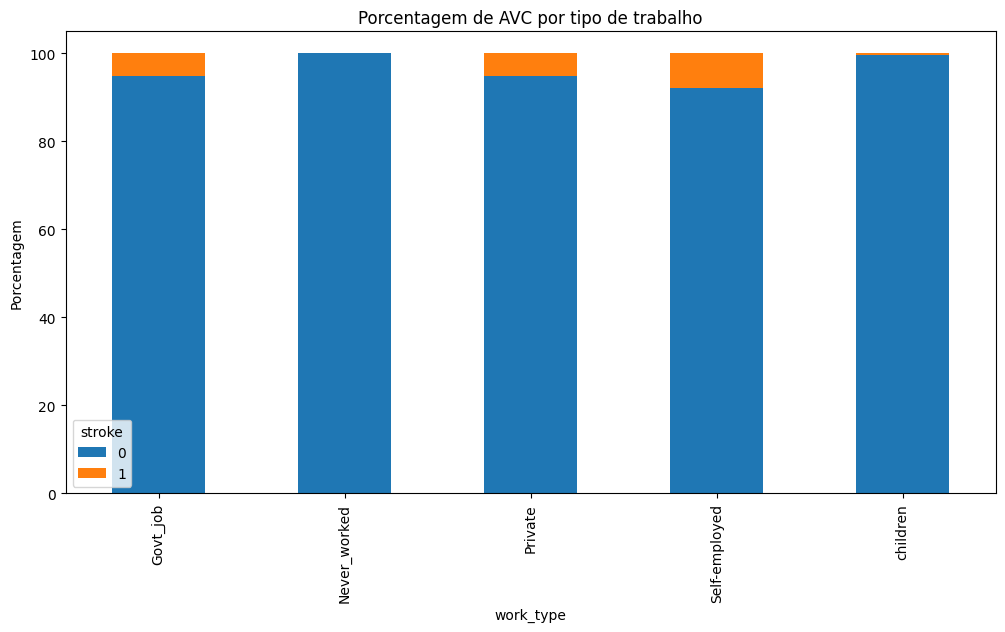

In [40]:
# Cria uma tabela de contingência
stroke_worktype = pd.crosstab(df['work_type'], df['stroke'], normalize='index')

# Multiplica por 100 para obter porcentagens
stroke_worktype *= 100

# Plot o gráfico de barras empilhadas
stroke_worktype.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Porcentagem')
plt.title('Porcentagem de AVC por tipo de trabalho')
plt.show()

4. **Comparação da distribuição de idade entre pacientes com e sem AVC:**

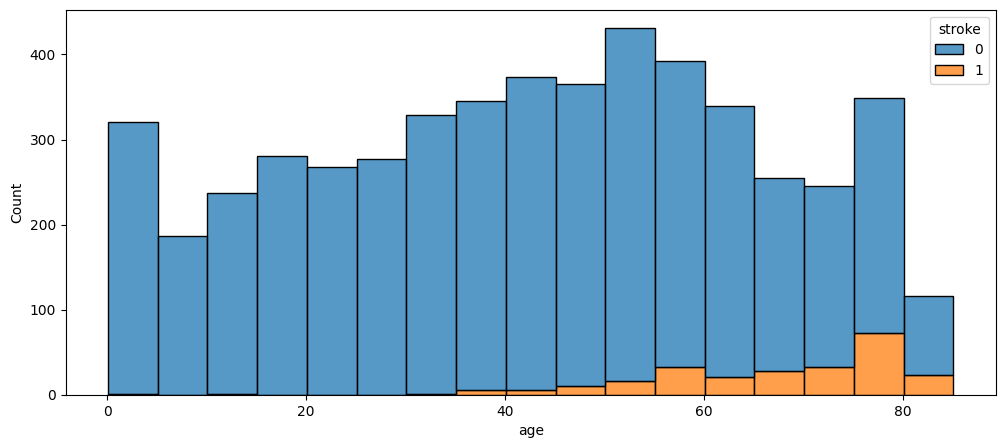

In [14]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='age', hue='stroke', multiple='stack', binwidth=5)
plt.show()

5. **Relação entre hipertensão, doença cardíaca e AVC:**

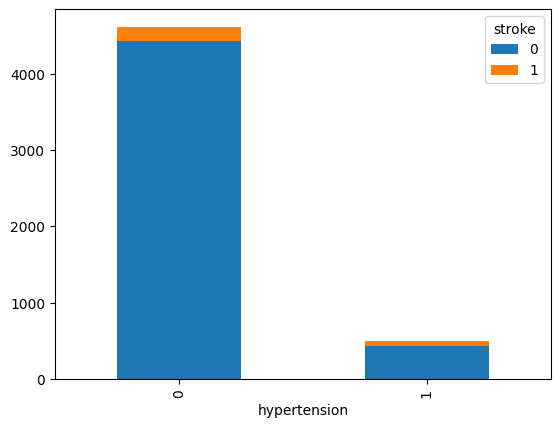

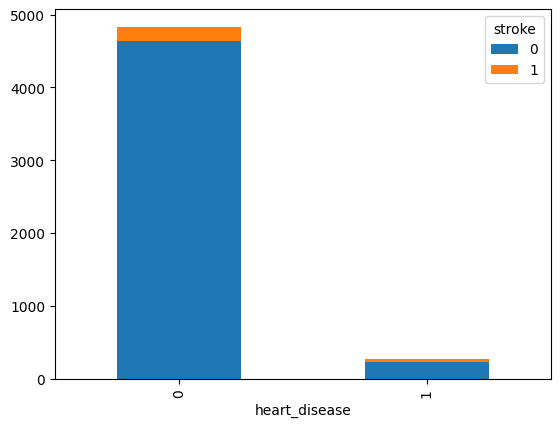

In [15]:
pd.crosstab(df['hypertension'], df['stroke']).plot(kind='bar', stacked=True)
pd.crosstab(df['heart_disease'], df['stroke']).plot(kind='bar', stacked=True)
plt.show()

6. **Relação entre massa corpórea (IMC) e AVC:**

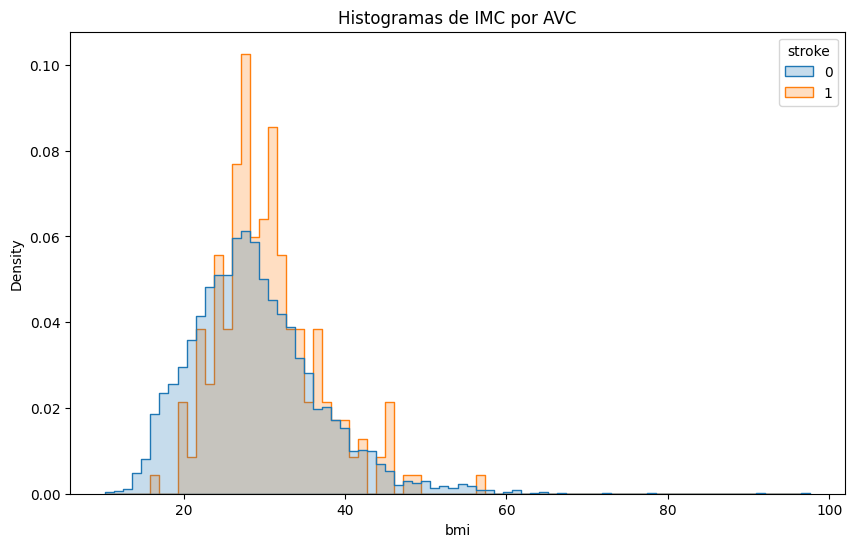

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='stroke', element='step', stat='density', common_norm=False)
plt.title('Histogramas de IMC por AVC')
plt.show()

7. **Contagem de pacientes com AVC por gênero**

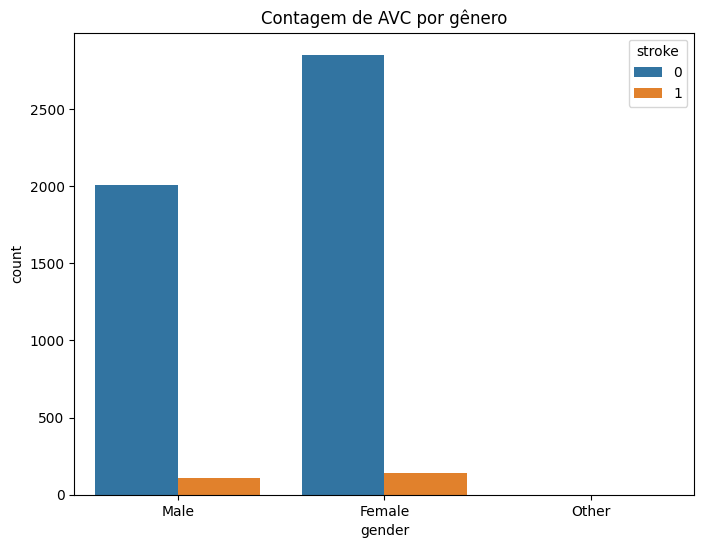

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Contagem de AVC por gênero')
plt.show()

8. **Contagem de pacientes com AVC por status de fumante**

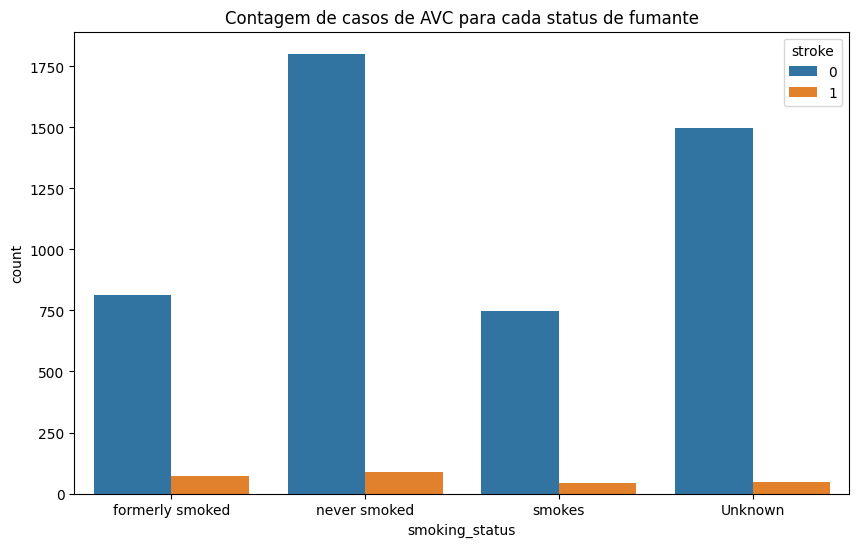

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Contagem de casos de AVC para cada status de fumante')
plt.show()


9. **Balanceamento de classes**

In [42]:
# Contar o número de observações em cada classe
class_counts = df['stroke'].value_counts()

print(class_counts)

stroke
0    4861
1     249
Name: count, dtype: int64


# Aplicando modelos de aprendizado

Q-Q plot for variable: age


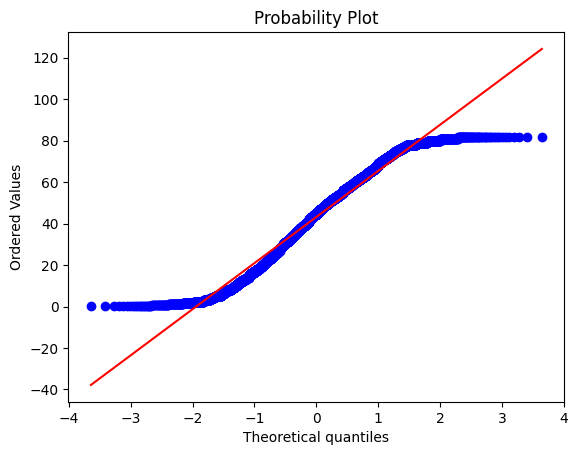

Q-Q plot for variable: avg_glucose_level


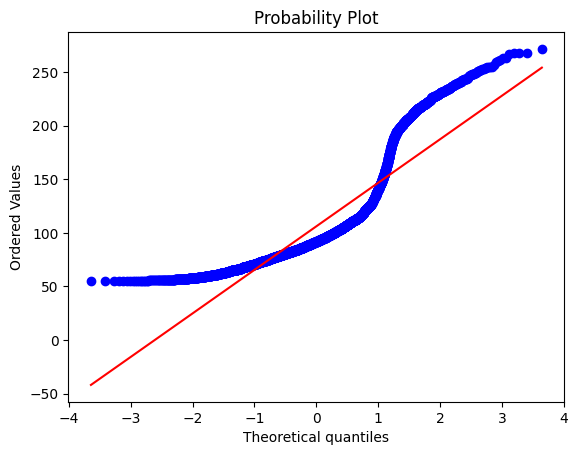

Q-Q plot for variable: bmi


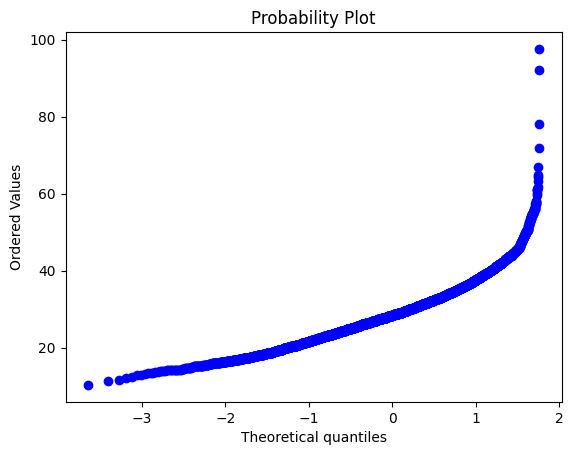

In [49]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# lista das colunas que devem ser normalizadas 
columns = ['age', 'avg_glucose_level', 'bmi']

for col in df[columns]:
    print(f"Q-Q plot for variable: {col}")
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.show()

#print(df.describe())

In [53]:
# Código alternativo simples para avaliar normalização
# Obtém mínimo e máximo
columns = ['age', 'avg_glucose_level', 'bmi']
desc = df[columns].describe()

# Checa se todos os mínimos estão acima ou iguais a 0 e todos os máximos estão abaixo ou iguais a 1
is_normalized = desc.loc['min'].ge(0).all() and desc.loc['max'].le(1).all()

print('Os dados estão normalizados?', is_normalized)

Os dados estão normalizados? False


### Pipeline

1. **K-NN (K-Nearest Neighbors):**

    - **Normalização:** K-NN é um algoritmo baseado em distância, o que significa que ele calcula a distância entre pontos para fazer suas previsões. Se uma característica tem uma escala muito maior do que outra, ela pode dominar a distância euclidiana e, portanto, o desempenho do modelo. Assim, é comum normalizar (escalar) as características para terem uma média de 0 e um desvio padrão de 1.

    - **Valores ausentes:** K-NN não lida bem com valores ausentes. Portanto, antes de aplicar K-NN, é importante tratar os valores ausentes, seja removendo as linhas com valores ausentes, seja preenchendo-as com um valor (como a média, mediana ou moda).

    - **Dados categóricos:** K-NN não lida diretamente com dados categóricos. Portanto, é necessário codificar esses dados de alguma forma, seja usando one-hot encoding, ordinal encoding ou algum outro método.

2. **Naive Bayes:**

    - **Valores ausentes:** Assim como o K-NN, Naive Bayes também não lida bem com valores ausentes e precisa de tratamento similar.

    - **Dados categóricos:** Naive Bayes pode lidar diretamente com dados categóricos, desde que você esteja usando uma versão do algoritmo que suporte isso (como o Categorical Naive Bayes no scikit-learn).

    - **Assunção de independência:** Naive Bayes assume que todas as características são independentes entre si. Enquanto isso raramente é verdade na prática, o algoritmo ainda pode funcionar bem. No entanto, se você sabe que certas características são altamente correlacionadas, pode valer a pena remover algumas delas para não violar a suposição de independência.

3. **Árvore de decisão:**

    - **Valores ausentes:** Árvores de decisão podem lidar com valores ausentes, mas o tratamento de valores ausentes ainda é comumente feito como parte do pré-processamento.

    - **Dados categóricos:** Árvores de decisão podem lidar com dados categóricos, mas alguns algoritmos de árvore de decisão (como os implementados no scikit-learn) requerem que os dados sejam numéricos. Portanto, pode ser necessário codificar os dados categóricos antes do treinamento.

    - **Normalização:** Ao contrário do K-NN, árvores de decisão não são sensíveis à escala das características. Portanto, a normalização ou a padronização geralmente não é necessária ao treinar uma árvore de decisão.

In [57]:
import pandas as pd
# Contar o número de observações em cada classe
class_counts = df['stroke'].value_counts()
print(class_counts)

# Avaliando se valores ausentes de "bmi" está balanceado entre as classes
missing_bmi_percentage = df.groupby('stroke')['bmi'].apply(lambda x: x.isnull().mean() * 100)
print(missing_bmi_percentage)

stroke
0    4861
1     249
Name: count, dtype: int64
stroke
0     3.312076
1    16.064257
Name: bmi, dtype: float64


Para o pré-processamento, preencheremos os valores ausentes no atributo "bmi" com a média e codificaremos os atributos categóricos.

Depois disso, aplicaremos cada um dos três algoritmos - K-NN, Naive Bayes e Árvore de Decisão - ajustando hiperparâmetros e aplicando validação cruzada.

Cross Validation score para knn:  0.9513213720696102
Accuracy para knn no set de teste:  0.9510763209393346
Report de classificação para knn:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

Matrix de Confusão para knn: 
 [[972   0]
 [ 50   0]]


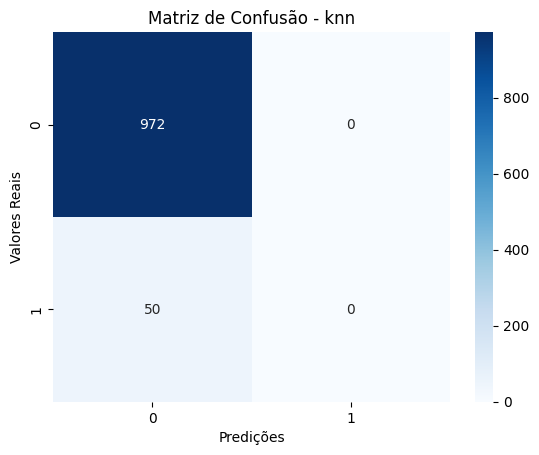

AUC ROC para knn:  0.6800205761316873


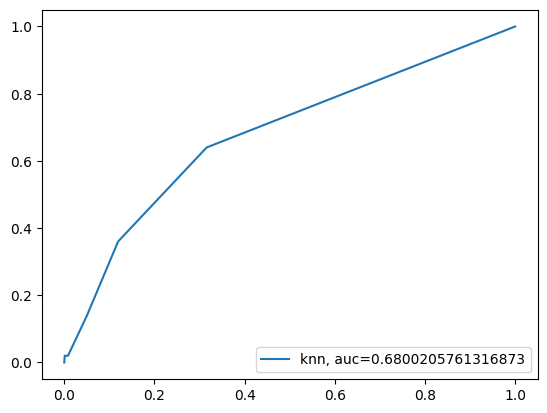

Cross Validation score para naive_bayes:  0.8659529459705642
Accuracy para naive_bayes no set de teste:  0.8669275929549902
Report de classificação para naive_bayes:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       972
           1       0.16      0.42      0.24        50

    accuracy                           0.87      1022
   macro avg       0.57      0.65      0.58      1022
weighted avg       0.93      0.87      0.89      1022

Matrix de Confusão para naive_bayes: 
 [[865 107]
 [ 29  21]]


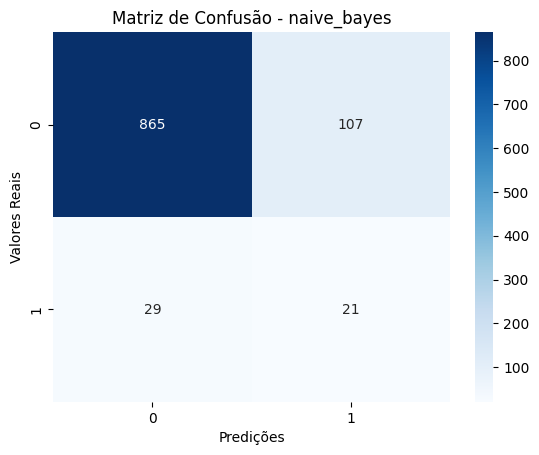

AUC ROC para naive_bayes:  0.8017078189300412


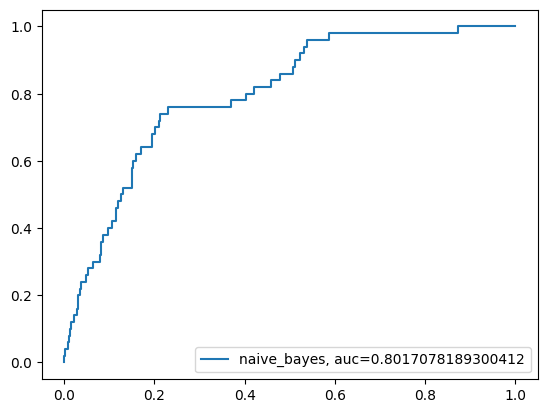

Cross Validation score para decision_tree:  0.9168284673282516
Accuracy para decision_tree no set de teste:  0.9178082191780822
Report de classificação para decision_tree:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       972
           1       0.19      0.20      0.19        50

    accuracy                           0.92      1022
   macro avg       0.57      0.58      0.57      1022
weighted avg       0.92      0.92      0.92      1022

Matrix de Confusão para decision_tree: 
 [[928  44]
 [ 40  10]]


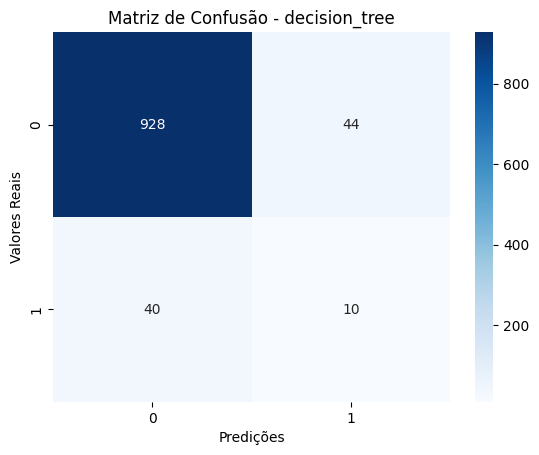

AUC ROC para decision_tree:  0.577366255144033


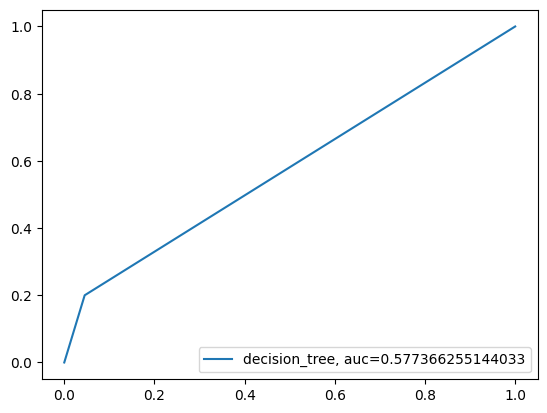

In [69]:
# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Separando o dataframe em X (características) e y (alvo)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Listando colunas numéricas e categóricas
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = X_train.select_dtypes(include=[object]).columns.tolist()

# Pré-processamento
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)])

# Modelos e parâmetros para GridSearch
models_params = {
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {'classifier__n_neighbors': range(1, 31)}
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {'classifier__criterion': ['gini', 'entropy']}
    }
}

# Loop para treinar e avaliar cada modelo
for model_name, model_params in models_params.items():
    # Criando pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model_params['model'])])
    
    # GridSearch para ajustar hiperparâmetros
    grid_clf = GridSearchCV(clf, param_grid=model_params['params'], cv=5)
    grid_clf.fit(X_train, y_train)
    best_clf = grid_clf.best_estimator_
    
    # Cross Validation com 10 folds
    scores = cross_val_score(best_clf, X_train, y_train, cv=10)
    print(f"Cross Validation score para {model_name}: ", scores.mean())

    # Aplicando o modelo na base de teste
    y_pred = best_clf.predict(X_test)
    y_prob = best_clf.predict_proba(X_test)[:,1]
    print(f"Accuracy para {model_name} no set de teste: ", metrics.accuracy_score(y_test, y_pred))

    # Relatório de Classificação
    print(f"Report de classificação para {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    print(f"Matrix de Confusão para {model_name}: \n", cm)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predições')
    plt.ylabel('Valores Reais')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()

    
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    print(f"AUC ROC para {model_name}: ", auc)
    plt.plot(fpr, tpr, label=f"{model_name}, auc={auc}")
    plt.legend(loc=4)
    plt.show()

# Conclusão

Relembrando o entendimento de cada métrica:

1. **Accuracy** (acurácia): Esta é a proporção de previsões corretas em relação ao total de previsões.
2. **Precision** (precisão): É a proporção de previsões corretas positivas em relação ao total de previsões positivas. Esta métrica é importante quando o custo de Falso Positivo é alto.
3. **Recall** (sensibilidade ou taxa de verdadeiros positivos): É a proporção de previsões positivas corretas em relação ao total de reais valores positivos. Esta métrica é importante quando o custo de Falso Negativo é alto.
4. **F1-score**: É a média harmônica entre precisão e recall, fornecendo um bom equilíbrio entre ambos.
5. **AUC ROC**: Esta é a área sob a curva ROC (Receiver Operating Characteristic). Valores mais altos geralmente indicam melhores modelos, sendo 1.0 o valor ideal.

A classe que estamos tentando prever é a casse 1, risco de AVC. Analisando essas métricas, podemos ver que:

- O modelo KNN tem uma alta acurácia (95%) e um bom desempenho na validação cruzada (também 95%). Entretanto, possui zero de precisão, recall e F1-score para a classe 1, que é a classe que estamos tentando prever (risco de AVC). Além disso, o AUC ROC para o KNN é 0.68, que é menor do que para Naive Bayes.
- O modelo Naive Bayes tem uma acurácia um pouco menor (0.86), mas tem um recall de 0.42 para a classe 1, o que significa que ele está capturando 42% dos verdadeiros positivos. Ele também tem o AUC ROC mais alto (0.80).
- A Árvore de Decisão tem uma acurácia um pouco mais baixa que o KNN (91.8%) e um desempenho similar na validação cruzada (91.3%). Como o Naive Bayes, a Árvore de Decisão está conseguindo prever algumas instâncias da classe 1 (9 de 50). O modelo tem um recall de 0.18 para a classe 1 e um AUC ROC de 0.57.

Considerando que nosso objetivo é identificar pessoas que têm mais probabilidade de sofrer um AVC, o recall é uma métrica importante, pois queremos minimizar o número de falsos negativos (ou seja, pessoas que sofrerão um AVC, mas o modelo não prevê). Além disso, o AUC ROC é uma métrica geral de desempenho de um modelo que também consideramos.

Portanto, o modelo Naive Bayes parece ser a melhor opção aqui, apesar de ter a acurácia menor do que o KNN, ele está capturando mais verdadeiros positivos (maior recall) e tem o AUC ROC mais alto.

Por fim, é importante mencionar que o dataset está desbalanceado (muito mais exemplos da classe 0 do que da classe 1), o que pode estar prejudicando o desempenho dos modelos. Métodos de reamostragem, como o oversampling ou undersampling, podem ser usados para lidar com isso. Além disso, é importante levar em conta o custo de cada tipo de erro (falsos positivos e falsos negativos) ao escolher o modelo.